In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [4]:
data_df = pd.read_csv('../data/Iris.csv', index_col='Id')
data_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
FEAT_COLS = data_df.columns.tolist()[:-1]
FEAT_COLS

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [8]:
X = data_df[FEAT_COLS].values
y = data_df['Species'].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3,random_state=10)

In [10]:
model_dict = {
    'KNN':KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression':LogisticRegression(C=1e3),
    'SVC':SVC(C=1e3)
}

 **防止过拟合**
- 为防止过拟合现象，在训练模型上，附加一个正则项，使得模型不至于在训练集上表现完美而在其他测试集上表现糟糕。
- 即为增大模型的容错率，允许模型在一定程度上犯错，从而使模型在其他测试集上面也可以表现良好
- 平衡损失函数和模型复杂度
    - minimize： Loss（ Data | Model）+ λ * Complexity（Model）
        - λ↑ => 正则化程度越高，及容错率越高 => model.score()↓，反之亦然
    - python中的超参数 C = 1 / λ，即 C↓ => λ↑ =>正则化程度越高，即容错率越高 => model.score()↓，反之亦然
    - ```C : float, default: 1.0
    Inverse of regularization strength; must be a positive float.
    Like in support vector machines, smaller values specify stronger
    regularization.```

In [19]:
for model_name, model in model_dict.items():
    model.fit(X_train,y_train)
    acc = model.score(X_test, y_test)
    print(model_name, ' -> Accuracy = ',acc, '\n')
    if model_name == 'Logistic Regression':
        print(model_name, 'coef: ',model.coef_, 'intercept: ', model.intercept_, 'n_iter: ', model.n_iter_, '\n')

KNN  -> Accuracy =  0.96 

Logistic Regression  -> Accuracy =  0.98 

Logistic Regression coef:  [[ 0.97763625  4.1730759  -6.16623172 -3.12000204]
 [ 1.31746663 -5.01663632 -0.55391925 -0.40159987]
 [-3.51196179 -3.2951611   6.62649332 11.90493262]] intercept:  [  0.58785677   8.98123422 -20.85573442] n_iter:  [12] 

SVC  -> Accuracy =  0.92 



**由于是四维特征一起做逻辑回归，所以coef，intercept无法可视化拟合曲线，那么两维特征呢？**

In [22]:
feat = ['PetalLengthCm', 'PetalWidthCm']
petal_x = data_df[feat].values
petal_y = data_df['Species'].values
x_tr,x_te,y_tr,y_te = train_test_split(petal_x,petal_y,test_size=1/3,random_state=10)

In [28]:
lr_model = LogisticRegression(C=1e3)
lr_model.fit(x_tr,y_tr)
acc = lr_model.score(x_te,y_te)
print(acc,'\n')
w = lr_model.coef_
b = lr_model.intercept_
print(w,'\n')
print(b)

0.96 

[[-4.20660872 -7.23031284]
 [ 1.15918386 -2.27200016]
 [ 4.01963072  9.24564821]] 

[ 15.64853284  -2.49623292 -34.28048679]


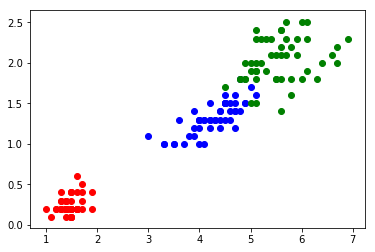

In [34]:
plt.scatter(x='PetalLengthCm',y='PetalWidthCm',data=data_df[data_df['Species']=='Iris-setosa'],c='r')
plt.scatter(x='PetalLengthCm',y='PetalWidthCm',data=data_df[data_df['Species']=='Iris-versicolor'],c='b')
plt.scatter(x='PetalLengthCm',y='PetalWidthCm',data=data_df[data_df['Species']=='Iris-virginica'],c='g')
# plt.plot(x=data_df['PetalLengthCm'], y=-4.20*data_df['PetalLengthCm']-7.23*data_df['PetalWidthCm']+15.64)

**特征维度还是太高，只用一个维度+2分类，来试一下呢？ **

In [53]:
petal_df = data_df[['PetalLengthCm','Species']]
#petal_df[:100,:] # 不加.values报错，TypeError: unhashable type: 'slice'

In [57]:
two_petal_df = pd.DataFrame(petal_df.values[:100,:],columns=['PetalLengthCm','Species']) #0-100行，所有列，只选择两种类别的iris
two_petal_df

,PetalLengthCm,Species
0,1.4,Iris-setosa
1,1.4,Iris-setosa
2,1.3,Iris-setosa
3,1.5,Iris-setosa
4,1.4,Iris-setosa
5,1.7,Iris-setosa
6,1.4,Iris-setosa
7,1.5,Iris-setosa
8,1.4,Iris-setosa
9,1.5,Iris-setosa


In [60]:
x1 = two_petal_df['PetalLengthCm'].values.reshape(-1,1)
y1 = two_petal_df['Species'].values
x1_tr,x1_te,y1_tr,y1_te = train_test_split(x1,y1,test_size=1/5,random_state=20)

In [65]:
logistic_model = LogisticRegression(C=1)
logistic_model.fit(x1_tr,y1_tr)
acc = logistic_model.score(x1_te,y1_te)
print(acc)
w = logistic_model.coef_
b = logistic_model.intercept_
print(w)
print(b)

1.0
[[1.55782411]]
[-3.85990207]


In [74]:
w[0][0]

1.5578241120415612

In [76]:
b[0]

-3.8599020698960858

In [83]:
x1[:,0]

1.4

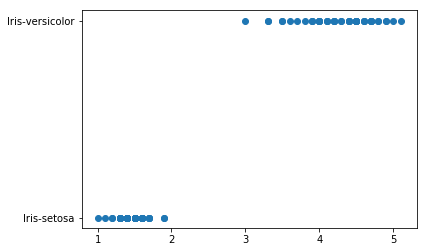

In [86]:
plt.scatter(x=x1,y=y1)
plt.show()

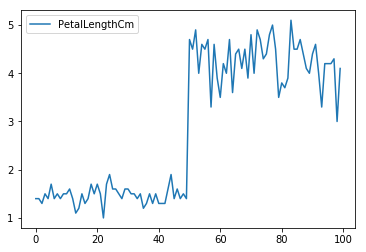

In [98]:
two_petal_df.plot()

**failed!!**
不知道怎么画逻辑回归拟合曲线

In [ ]:
```python
"""
    任务：鸢尾花识别
"""
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


DATA_FILE = './data_ai/Iris.csv'

SPECIES_LABEL_DICT = {
    'Iris-setosa':      0,  # 山鸢尾
    'Iris-versicolor':  1,  # 变色鸢尾
    'Iris-virginica':   2   # 维吉尼亚鸢尾
}

# 使用的特征列
FEAT_COLS = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


def main():
    """
        主函数
    """
    # 读取数据集
    iris_data = pd.read_csv(DATA_FILE, index_col='Id')
    iris_data['Label'] = iris_data['Species'].map(SPECIES_LABEL_DICT)

    # 获取数据集特征
    X = iris_data[FEAT_COLS].values

    # 获取数据标签
    y = iris_data['Label'].values

    # 划分数据集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=10)

    model_dict = {'kNN': KNeighborsClassifier(n_neighbors=7),
                  'Logistic Regression': LogisticRegression(C=1e5),
                  'SVM': SVC(C=1e5)}

    for model_name, model in model_dict.items():
        # 训练模型
        model.fit(X_train, y_train)
        # 验证模型
        acc = model.score(X_test, y_test)
        print('{}模型的预测准确率:{:.2f}%'.format(model_name, acc * 100))


if __name__ == '__main__':
    main()
```